# DTSC-670 Final Project

## Name: Anthony Castellano

# Overview

## Problem Framing & Big Picture

### The Problem

At this school disctrict we would like to predict the grades in the third term using historical data. We have information about many features of the students lives. Using this data and machine learning we can create models to predict the third term grades of students. This can be useful because if we can predict a students third term grade based on their past data we can supplement the students accordingly to increase the likelihood that the student achieves a higher third term grade than they would've otherwise.

### Frame of the Problem

To predict third term grades we will use supervised machine learning techniques. This means that the machine learning techniques use labeled data to train data and recognize patterns. If the data was unlabeled then we would use unsupervised learning to detect anomalies and relationships between data. With supervised learning we can use classifcation or regression techniques to make predictions about the data. With classification modeling we can make predictions about what group or label instances of data fall into. With regression modeling we can use continous data to see where new instances would fall based on a feature of the data. We will be using batch learning for this model because we don't need to continously update the model when new information comes in. At the end of each school year the model can be updated on the data that was collected throughout the year. There are features of the data for each student that won't change as well. For example, if the mother or father pursued higher education, and if the student attended nursery school. With online learning data is collected and the model is updated continously and that won't be needed for this task because students don't leave and go into the school district often enough where that would be necessary and alot of the data would stay the same for each student throughout the year.

### Machine Learning with Business Problem

We will be implementing a Regression machine learning task to predict the student's third term grades. We will use continous data to make predictions about where new instances will fall based on features of the data. With classification data we can make predictions about what groups the third term grades will fall into. With regression modeling we can use features of a student to predict what their third term grade will be. For this task we want to use regression modeling because we want to predict the students grade, not the group that the student's grade will fall in.

### Metrics

To measure the model's performance we will use cross validation and RMSE (root mean squared error) scores. Cross validation seperates the training data into groups/folds, uses one of the folds as the validation set and the rest of the folds to train the data. The process is repeated multiple times and the result is averaged to produce the models performance metric. RMSE represents the difference between the predicted values and the actual values to be predicted.

### Additional Information

The values predicted by the regression model shouldn't be used as exact predictions of the student's third term grade. The values produced by the model should be used as a cornerstone to predict the thirs term grades for the student. These predictions should be used as a template to give a student the resources they need to succeed academically within the school district. Based on the features given to the model and what we predict the student's third term grade to be does not mean that a student with a predicted low third term grade will achieve that grade.

## Get the Data

### Import Data

In [649]:
#Importing Pandas Library
import pandas as pd

#Importing data assuming the data is in the same file as the notebook
data = pd.read_csv("student-mat.csv")

### Size and Type of Data

In [650]:
#Size and Type of Data
print('\033[1m' +"data frame size: " + '\033[0m', data.size)
print('\033[1m' + "data frame data types:" + '\033[0m')
print(data.dtypes)
print('\033[1m' + "data frame shape:" + '\033[0m', data.shape)

data frame size:  13825
data frame data types:
school          object
sex             object
age            float64
address         object
famsize         object
Pstatus         object
Medu             int64
Fedu             int64
Mjob            object
Fjob            object
reason          object
guardian        object
traveltime       int64
studytime        int64
failures         int64
schoolsup       object
famsup          object
paid            object
activities      object
nursery         object
higher          object
internet        object
romantic        object
famrel           int64
freetime         int64
goout            int64
Dalc             int64
Walc             int64
health           int64
absences_G1    float64
absences_G2    float64
absences_G3    float64
G1               int64
G2               int64
G3               int64
dtype: object
data frame shape: (395, 35)


The size of the data is 13825 with 35 columns and 395 rows. There are 17 features with an object data type, 4 features with a float data type, and 14 features with an integer data type. An object data type usually represents categorical data. Float data types represents decimals, and integer data types represent whole numbers.

### Features and Descriptions

**school**: student's school ("GP" = Gabriel Pereira, "MS" = Mousinho da Silveira)\
**sex**: student's sex ("F" = female, "M" = male)\
**age**: student's age (numeric value 15-22)\
**address**: student's home address type ("U" = urban, "R" = rural)\
**famsize**: family size ("LE3" = less than or equal to three, "GT3" = greater than three)\
**Pstatus**: parents cohabitation staus ("T" = living together, "A" = apart)\
**Medu**: mothers education (0 - none, 1 - primary education (4th grade), 2 = 5th to 9th
grade, 3 = secondary education or 4 = higher education)\
**Fedu**: father's education (0 = none, 1 - primary education (4th grade), 2 = 5th to 9th
grade, 3 = secondary education or 4 = higher education)\
**Mjob**: mother's job ( "teacher", "health" care related, civil "services" (e.g. administrative
or police), "at_home" or "other")\
**Fjob**: fathers job  ("teacher", "health" care related, civil "services" (e.g. administrative or
police), "at_home" or "other")\
**reason**: reason to choose school (close to "home", school "reputation", "course"
preference or "other")\
**gaurdian**: student's gaurdian ("mother", "father" or "other")\
**traveltime**: home to school travel time  (1 = <15 min., 2 = 15 to 30 min., 3 = 30 min. to 1
hour, or 4 = >1 hour)\
**studytime**: weekly study time (1 = <2 hours, 2 = 2 to 5 hours, 3 = 5 to 10 hours, or 4 = >10
hours)\
**failures**: amount of past class failures (n if 1 <= n <= 4, else 4)\
**schoolsup**: educational support (yes or no)\
**famsup**: family educational support (yes or no)\
**paid**: paid classes within the course subjects, Math or Portuguese (yes or no)\
**activities**: extra-curricular activities (yes or no)\
**nursery**: attended nursery school (yes or no)\
**higher**: wants to pursue higher education (yes or no)\
**internet**: has internet access at home (yes or no)\
**romantic**: in a romantic relationship (yes or no)\
**famrel**: quality of family relationship (1 = very bad to 5 = excellent)\
**freetime**: free time after school (1 = very low to 5 = very high)\
**goout**: time going out with friends (1 = very low to 5 = very high)\
**Dalc**: workday alcohol consumption (1 = very low to 5 = very high)\
**Walc**: weekend alcohol consumption (1 = very low to 5 = very high)\
**health**: current health status (1 = very bad to 5 = excellent)\
**absences_G1**: number of absences for G1 term (numeric)\
**absences_G2**: number of absences for G2 term (numeric)\
**absences_G3**: number of absences for G3 term (numeric)\
**G1**: first term grade (0 to 20)\
**G2**: second term grade (0 to 20)\
**G3**: third term grade (0 to 20)

The above shows each feature and what it's values represent.

### Target  Attribute

The target attributes is 'G3' which represents the student's third term grade.

### Splitting Data

In [651]:
# Importing sklearn train_test_split function
from sklearn.model_selection import train_test_split

# Dropping G3 column for X train/test set
X = data.drop(['G3'], axis = 1)

# Creating G3 series for target labels
y = pd.Series(data['G3'])

# Create train/test set with 80% of instances for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

The data is split with 80% of the data going towards the training set and 20% going towards the test set. The training set contains all of the features except the 'G3' feature. The test set contains only the 'G3' feature.

## Explore the Data

### Training Set Attributes and Characteristics

In [652]:
# Importing Numpy library
import numpy as np

# Printing out Column Size, Data Types, and Descriptive Statistics for X_train and y_train
print('\033[1m' + "X_Train Column Size and Data Types" + '\033[0m')
print(X_train.info())
print("-"*80)
print('\033[1m' + "X_Train Numerical Column Descriptive Statistics" + '\033[0m')
print(X_train.describe(include=[np.number]))
print("-"*80)
print('\033[1m' + "X_Train Categorical Column Descriptive Statistics" + '\033[0m')
print(X_train.describe(include=[object]))
print("-"*80)
print('\033[1m' + "y_train Column Size and Data Types" + '\033[0m')
print(y_train.info())
print("-"*80)
print('\033[1m' + "y_train Descriptive Statistics" + '\033[0m')
print(y_train.describe())

X_Train Column Size and Data Types
<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 137 to 379
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       316 non-null    object 
 1   sex          316 non-null    object 
 2   age          307 non-null    float64
 3   address      316 non-null    object 
 4   famsize      316 non-null    object 
 5   Pstatus      316 non-null    object 
 6   Medu         316 non-null    int64  
 7   Fedu         316 non-null    int64  
 8   Mjob         316 non-null    object 
 9   Fjob         316 non-null    object 
 10  reason       316 non-null    object 
 11  guardian     316 non-null    object 
 12  traveltime   316 non-null    int64  
 13  studytime    316 non-null    int64  
 14  failures     316 non-null    int64  
 15  schoolsup    316 non-null    object 
 16  famsup       316 non-null    object 
 17  paid         316 non-null    object 
 18  activities   

Looking at X_train's column size and data types shows us that the 'age', 'absences_G1', 'absences_G2', and 'absences_G3' contain null values that will have to be cleaned later.

In the descriptive statistics we can see that the average student is 16 years old, most student's don;t fail their classes, an average amount of free time and time to go out with friends.

Most student's only study less than 2 hours per week. There are more absences in the third term.

Looking at the categorical features we can see that most students go to GP, are female, live in an urban setting, have more than 3 family members, have parents who live together, have their mother listed as their guardian, want to pursue a higher form of education, have internet access, and are in a romantic relationship. Most students do not have extra educational support, but they do have family educational support.

Looking at the y_train size and data type shows us that there are no null values and that the values are float data type.

The descriptive statitistics of y_train alludes that the grades are evenly distributed.

### Visualization 1

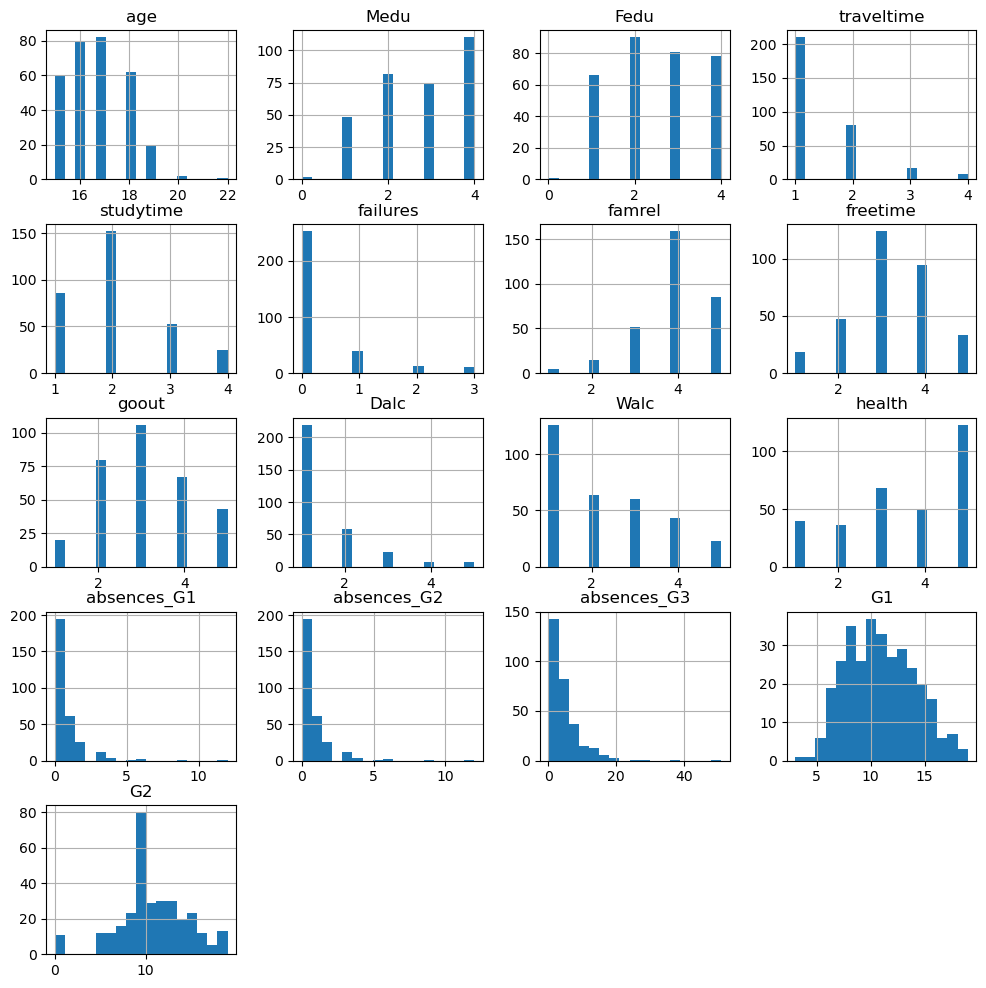

In [683]:
# importing matplotlib
import matplotlib.pyplot as plt

# Inspriation for this visualization came from the Data Exploration video in Module 2

# Plotting Histograms of Numeric X_train data
X_train.hist(bins = 17, figsize=(12,12))
plt.show()

Visualizing the numeric data as histograms shows us multiple things:

1. The G1 and G2 grades look normally distributed.
2. Most of the students live close to their school.
3. There are more absences in G3.
4. There are more instances of weekend alcohol consumption compared to workday.
5. Most students don't fail their classes.
6. Student's have a good relationship with their familes.

### Visualization 2

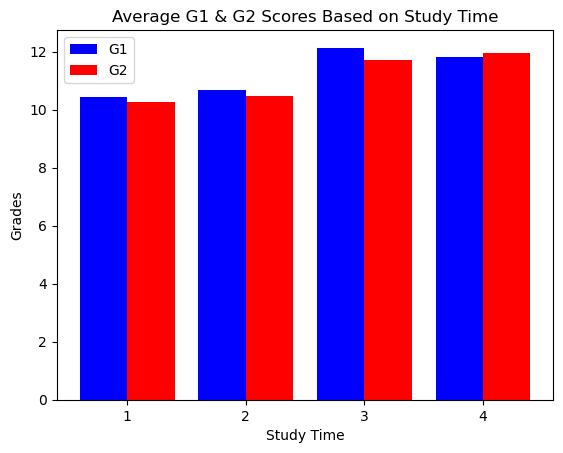

In [684]:
# inspiration for this visualization came from geeksforgeeks.org
# https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/#

# grouping mean values of X_train by study time
numeric_cols = X_train.select_dtypes(include='number').columns
avg_vals = X_train[numeric_cols].groupby('studytime').mean().reset_index()

# plotting bar chart of G1 & G2 values
plt.bar(avg_vals.index - .2, avg_vals['G1'], 0.4, color = 'blue', label = 'G1') 
plt.bar(avg_vals.index + .2, avg_vals['G2'], 0.4, color = 'red', label = 'G2') 

# configuring x-labels, y-labels, title, and legend of the chart
plt.xticks(avg_vals.index, avg_vals['studytime']) 
plt.xlabel("Study Time") 
plt.ylabel("Grades") 
plt.title("Average G1 & G2 Scores Based on Study Time") 
plt.legend() 
plt.show() 

Looking at the average G1 and G2 scores with the student's study time shows us that a student who studys more will achieve a higher score but a student who studys more than 10 hours will get a lower score in G1 compared to G2 on average.

### Visualization 3

<Axes: title={'center': 'G1 Grades based on Absences and if Student had Internet Access'}, xlabel='absences_G1', ylabel='G1'>

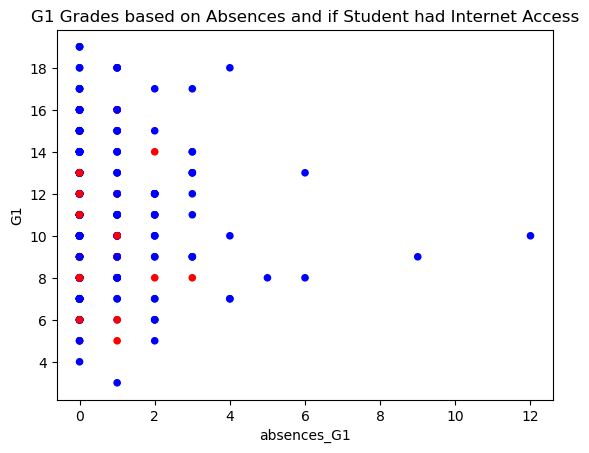

In [655]:
# creating copy of X_train dataframe
X_train_copy = X_train.copy()

# color dictionary of yes/no to blue/red
colors = {'yes': 'blue', 'no': 'red'}

# mapping color dictionary to internet feature
X_train_copy['color'] = X_train_copy['internet'].map(colors)

#creating scatter plot of G1 grades based on absences and if the student had internet access at home
X_train_copy.plot(kind="scatter", x = "absences_G1", y = "G1", c = 'color', title = 'G1 Grades based on Absences and if Student had Internet Access')

This chart shows us that a student with a high amount of absences will have an average term grade and that a student's absence amount does not necessarily determine their grade for the term. A student could be absent for various reasons adn it does not reflect their inteligence.

### Visualization 4

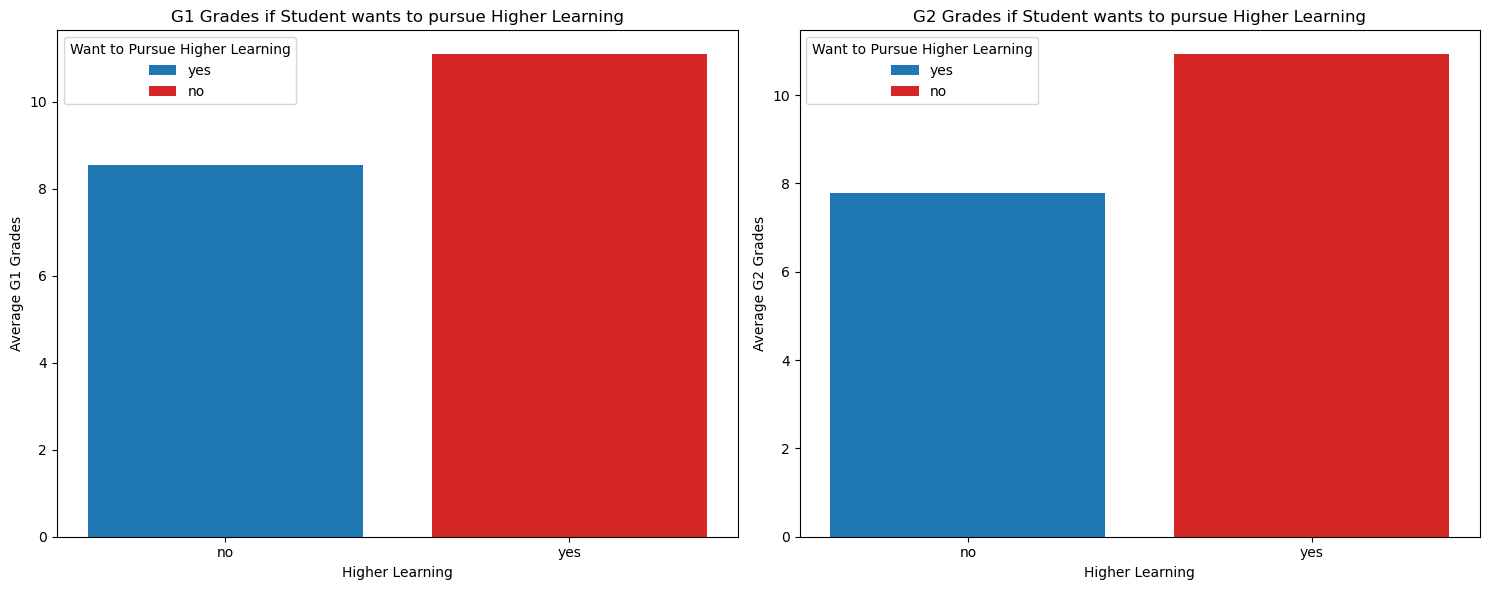

In [686]:
# configuring fig, ax1, ax2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))

# grouping mean G1 values by higher education feature
avg_vals1 = X_train.groupby('higher')['G1'].mean().reset_index()

# configuring bar labels and colors
bar_labels = ['yes', 'no']
bar_colors = ['tab:blue', 'tab:red']

# creating bar chart for G1 grades and higher education feature
ax1.bar(avg_vals1['higher'], avg_vals1['G1'], label=bar_labels, color=bar_colors)

# configuring y-label, x-label, legend, and title for G1 bar chart
ax1.set_ylabel('Average G1 Grades')
ax1.set_xlabel('Higher Learning')
ax1.set_title('G1 Grades if Student wants to pursue Higher Learning')
ax1.legend(title='Want to Pursue Higher Learning')

# grouping mean G2 values by higher education feature
avg_vals2 = X_train.groupby('higher')['G2'].mean().reset_index()

# creating bar chart for G2 grades and higher education feature
ax2.bar(avg_vals2['higher'], avg_vals2['G2'], label=bar_labels, color=bar_colors)

# configuring y-label, x-label, legend, and title for G2 bar chart
ax2.set_ylabel('Average G2 Grades')
ax2.set_xlabel('Higher Learning')
ax2.set_title('G2 Grades if Student wants to pursue Higher Learning')
ax2.legend(title='Want to Pursue Higher Learning')

# plotting bar charts
plt.tight_layout()

plt.show()

This chart tells us that students who want to pursue a higher form of education will have higher term grades. This could be because a student who doesn't want to pursue a higher form of education does put in effort towards school or they do not have to care about their term grades which usually determine what school they can enroll into for their higher education.

### Visualization 5

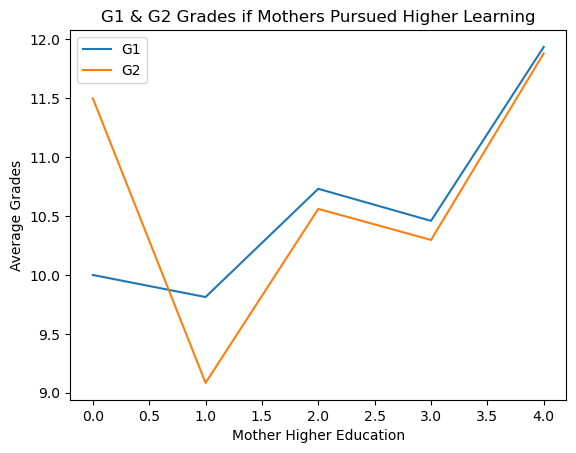

In [687]:
# inspiration for this visualization came from matplotlib.org
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/categorical_variables.html

# grouping mean values of X_train by Medu feature
avg_vals2 = X_train[numeric_cols].groupby('Medu').mean().reset_index()

# configuring subplots
fig2, ax3 = plt.subplots()

# plotting Medu values by G1 & G2
ax3.plot(avg_vals2['Medu'], avg_vals2['G1'], label = 'G1')
ax3.plot(avg_vals2['Medu'], avg_vals2['G2'], label = 'G2')

# configuring y-label, x-label, legend, and title of chart 
ax3.set_ylabel('Average Grades')
ax3.set_xlabel('Mother Higher Education')
ax3.set_title('G1 & G2 Grades if Mothers Pursued Higher Learning')
ax3.legend()

# showing the plot
plt.show()

Since most students put their mother as their guardian, I thought that it would be interesting to see if a student's mother had any influence on a student's term grades because of the motehrs education level. We can see that student's with mothers who have no education have higher scores, but if we take that out of the scope then a student whose mother has a higher education has higher scores than students with mothers with lower foms of education. The students with mothers with no education having higher scores could be because these students have a different motivation for achieving higher scores than students with mothers with educations. The students with mothers that are educated could be influenced by their mothers. The mothers with higher forms of education most likely have a higher values towards education and could pass these values down to their children.

### Correlations

In [658]:
# creating list of numeric features
num_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
           'absences_G1', 'absences_G2', 'absences_G3', 'G1', 'G2']

# creating correlation matrix of X_train's numeric features
corr_matrix = X_train[num_cols].corr()
corr_matrix

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2
age,1.000000,-0.197540,-0.171846,0.064728,0.029234,0.260136,0.044146,-0.039524,0.074992,0.123107,0.135065,-0.098593,0.199139,0.199139,0.241777,-0.065845,-0.108806
Medu,-0.197540,1.000000,0.601105,-0.179248,0.062720,-0.208537,0.017026,0.008558,0.058265,0.026326,-0.033261,-0.042636,0.066327,0.066327,0.072516,0.207368,0.222763
Fedu,-0.171846,0.601105,1.000000,-0.136600,-0.033882,-0.247380,0.038058,-0.034935,0.006124,-0.004958,-0.001333,0.016991,0.010195,0.010195,-0.005392,0.187806,0.164960
traveltime,0.064728,-0.179248,-0.136600,1.000000,-0.140848,0.121943,-0.054562,0.009326,0.041693,0.152487,0.162876,0.032196,0.042100,0.042100,-0.000316,-0.128361,-0.193330
studytime,0.029234,0.062720,-0.033882,-0.140848,1.000000,-0.151018,0.044392,-0.172741,-0.080733,-0.223688,-0.269951,-0.071026,-0.087612,-0.087612,-0.082178,0.164169,0.148312
failures,0.260136,-0.208537,-0.247380,0.121943,-0.151018,1.000000,-0.063201,0.103162,0.127798,0.145326,0.125893,0.060274,0.048493,0.048493,0.032857,-0.330677,-0.347295
famrel,0.044146,0.017026,0.038058,-0.054562,0.044392,-0.063201,1.000000,0.110162,0.065523,-0.105627,-0.137401,0.106674,-0.022714,-0.022714,-0.041628,0.007952,-0.022995
freetime,-0.039524,0.008558,-0.034935,0.009326,-0.172741,0.103162,0.110162,1.000000,0.289396,0.212713,0.184212,0.090878,-0.086919,-0.086919,-0.072943,0.011583,-0.013965
goout,0.074992,0.058265,0.006124,0.041693,-0.080733,0.127798,0.065523,0.289396,1.000000,0.295201,0.440788,-0.029303,0.008716,0.008716,0.023924,-0.161467,-0.166501
Dalc,0.123107,0.026326,-0.004958,0.152487,-0.223688,0.145326,-0.105627,0.212713,0.295201,1.000000,0.679450,0.051676,0.075813,0.075813,0.094153,-0.100812,-0.070015


In [659]:
# sort G1 & G2 correlations by ascending values
g1_corr = corr_matrix['G1'].sort_values(ascending =False)
g2_corr = corr_matrix['G2'].sort_values(ascending =False)

# printing out correlations
print('\033[1m' + "G1 Correlations:" + '\033[0m')
print(g1_corr)
print()
print('\033[1m' + "G2 Correlations:" + '\033[0m')
print(g2_corr)

G1 Correlations:
G1             1.000000
G2             0.846967
Medu           0.207368
Fedu           0.187806
studytime      0.164169
freetime       0.011583
famrel         0.007952
absences_G3   -0.028431
absences_G1   -0.048955
absences_G2   -0.048955
age           -0.065845
health        -0.069547
Dalc          -0.100812
Walc          -0.116257
traveltime    -0.128361
goout         -0.161467
failures      -0.330677
Name: G1, dtype: float64

G2 Correlations:
G2             1.000000
G1             0.846967
Medu           0.222763
Fedu           0.164960
studytime      0.148312
freetime      -0.013965
famrel        -0.022995
absences_G3   -0.033681
absences_G2   -0.065888
absences_G1   -0.065888
Dalc          -0.070015
Walc          -0.089233
health        -0.107901
age           -0.108806
goout         -0.166501
traveltime    -0.193330
failures      -0.347295
Name: G2, dtype: float64


A student's previous term grades have the strongest correlations between all of the features. With this knowledge I decided to see how each feature correlates to each terms grade. While the the correlations are not strong, we can see that a mother's and father's education level, studytime, and amount of failures have some correlation to a student's term grade.

## Prepare the Data

### Feature Selection

In [660]:
#Function/custom transformer to perform feature selection

# global list of absences features column names
ab_feat = ['absences_G1', 'absences_G2', 'absences_G3']

# global list for G1/G2
g = ['G1', 'G2']

def getFeat(c, cr):
    # create emptylist
    f = []
    
    # make negative version of the criteria
    cr_neg = cr *-1
    
    # go through each correlation matrix and add the feature name that meets the criteria to the empty list
    for i in range(len(c)):
        if c.iloc[i:i+1][0] > cr or c.iloc[i:i+1][0] < cr_neg:
            f.append(c[i:i+1].index[0])
            
    # return the list of feature names
    return f

def featureSelector(corr1, corr2, cat_feat, dataframe, crit):
    # create empty dataframe and list
    new_df = pd.DataFrame()
    same_feats = []
    
    # function to get the features of a specific correlation criteria
    f1 = getFeat(corr1, crit)
    f2 = getFeat(corr2, crit)
    
    # select only the features that are the same for both correlations and meet the criteria
    for i in range(len(f1)):
        for j in range(len(f2)):
            if f1[i] == f2[j]:
                same_feats.append(f1[i])
    
    # add the absence features if they are not already selected
    same_feat_set = set(same_feats)
    for k in ab_feat:
        if k not in same_feat_set:
            same_feats.append(k)
            
    # add the catergorical features that I felt were significant from the descriptive stats
    same_feats.extend(cat_feat)
    selected_cols = dataframe[same_feats]
    
    # reset the new dataframes index and return the dataframe
    new_df = selected_cols.copy().reset_index(drop = True)
    return new_df

# list of categorical features I felt were significant from the descriptive stats
cat_feats = ['school', 'activities', 'internet', 'Pstatus', 'schoolsup', 'famsup']

# create new dataframe using custom function that takes in G1/G2 correlation matrix, categorical features, X_train dataframe,
# and a correlation criteria
X_train_new = featureSelector(g1_corr, g2_corr, cat_feats, X_train, .13)

# create list of the features of the new dataframe inorder to create testing data
col_names = X_train_new.columns.tolist()
num_col_names_df = X_train_new.drop(columns = cat_feats, axis = 1)
num_col_names = num_col_names_df.columns.tolist()

# function to get the indexes of a dataframe based on a list
def getIndex(l, df):
    o = []
    for name in l:
        if name in df.columns:
            o.append(df.columns.get_loc(name))
    return o

# displaying the prepared data based on the feature selection
X_train_new

,G1,G2,Medu,Fedu,studytime,goout,failures,absences_G1,absences_G2,absences_G3,school,activities,internet,Pstatus,schoolsup,famsup
0,4,0,3,3,1,2,2,0.0,0.0,0.0,GP,yes,yes,A,no,yes
1,10,10,4,3,2,3,0,0.0,0.0,2.0,GP,no,yes,T,no,yes
2,10,12,2,3,1,2,0,0.0,0.0,2.0,GP,yes,yes,T,yes,yes
3,9,9,2,1,2,2,0,1.0,1.0,6.0,GP,yes,yes,T,no,no
4,8,7,2,2,2,4,0,0.0,0.0,0.0,GP,no,yes,T,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,7,10,1,1,4,2,1,0.0,0.0,2.0,GP,yes,yes,T,yes,yes
312,12,12,4,3,2,5,0,2.0,2.0,10.0,GP,yes,yes,T,no,no
313,5,0,3,2,1,4,3,0.0,0.0,0.0,GP,no,yes,T,no,yes
314,7,7,3,1,2,3,3,0.0,0.0,5.0,GP,no,yes,A,no,yes


The function above selects features to include in the training dataset based on how they correlate to the 'G1' and 'G2' features. The procedure of the feature selcting function are as follow.

Feature Selection Function:
1. The feature selction function "featureSelector()" is called and takes the arranged g1 correlation matrix, arranged g2 correlation matrix, a list of categorical features to include, the original training dataset, and a criteria number to select the features by.
2. An empty data frame and list are created. The list will store features that are the same in both arranged correlation matrices that meet the correlation criteria.
3. A function is ran to get the features that meet the criteria for both matrices. The function is called "getFeat()"
    1. The "getFeat()" function takes a correlation matrix and the correlation criteria in a parameters.
    2. An empty list is created to store the features is created and a negative version of the criteria parameter is created.
    3. A loop goes through each correlation matrix and if a feature has a correlation greater than the criteria or less than the negative criteria then it is put in the list.
    4. The list is returned.
4. After recieving both lists for each matrix, then the lists are compared and the features that are in both lists are added to the original empty list that was made in step 1.
5. The absence features are added to the same feature list if they are not already in the list.
6. The features that are in the categorical feature list are added to the same feature list.
7. The index of the dataframe is reset and the new dataframe is returned.

In the above code two lists that contain the absence features and G1/G2 features are stored respectively.

Another function called "getIndex()" was made to get the index of a feature in a dataframe based on a list input.


### Data Preperation with Custom Transformer

In [661]:
# import BaseEstimator and TransformerMixin from sklearn
from sklearn.base import BaseEstimator, TransformerMixin

# create Custom Transformer class called removeGCol
class removeGCol(BaseEstimator, TransformerMixin):
    
    # intialize dropCol, acol_index, and gcol_index variables
    def __init__(self, col_n, dropCol = True):
        self.dropCol = dropCol
        self.col_n = col_n
    
    # define fit function
    def fit(self, X, y = None):
        return self
    
    # define transform function
    def transform(self, X):
        # make dataframe from numpy array values
        X = pd.DataFrame(X, columns = self.col_n)
        
        # get index of absence and G1/G2 columns
        acol_index = getIndex(ab_feat, X)
        gcol_index = getIndex(g, X)
        
        # select absence columns
        abs_cols = X.iloc[:, acol_index]
        
        # sum absence columns
        X['absences_sum'] = abs_cols.sum(axis=1)
        
        # get names of absence columns
        abs_col_names = X.columns[acol_index]
        
        # drop absence columns
        X.drop(columns = abs_col_names, inplace = True)
        
        # condition statement for if dropCol variable is true
        if self.dropCol:
            
            # get G1/G2 column names
            gcol_names = X.columns[gcol_index]
            
            # drop G1/G2 columns
            X.drop(columns = gcol_names, inplace = True)
            
            # return dataframe
            return X
        # returns dataframe if dropCol variable is false
        else:
            return X
    

The custom transformer above creates a new column in the dataset that is a sum of the absence values for each term and stores in in a column called "absences_sum". The custom transformer has a parameter that is set to "True" will drop the "G1" and "G2" columns.

In [662]:
# import make_pipeline, StandardScaler, SimpleImputer, OneHotEncoder, and ColumnTransformer sklearn functions
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# numeric column attributes with G1/G2
num_attributes1 = num_col_names

# numeric column attributes without G1/G2
num_attributes2 = num_attributes1.copy()
for v in g:
    if v in num_attributes2:
       num_attributes2.remove(v) 

### Pipeline Creation

### Filling in Missing Values

In [663]:
# first pipeline with no column drop that fills NAs, scales the features, and runs custom transformer
num_pipeline1 = make_pipeline(
        SimpleImputer(strategy = 'median'),
        removeGCol(num_attributes1, dropCol = False),
        StandardScaler())

### Feature Scaling

In [664]:
# second pipeline with column drop that fills NAs, scales the features, and runs custom transformer
num_pipeline2 = make_pipeline(
        SimpleImputer(strategy = 'median'),
        removeGCol(num_attributes2, dropCol = True),
        StandardScaler())

### One-Hot Encoding

In [665]:
# categorical feature pipeline
cat_pipeline = make_pipeline(
    OneHotEncoder(drop='first'))

### Column Transformer

In [666]:
# column transformer for nondropped column training set
preprocessing1 = ColumnTransformer([
    ("num", num_pipeline1, num_attributes1),
    ("cat", cat_pipeline, cat_feats)
])

# column transformer for dropped column training set
preprocessing2 = ColumnTransformer([
    ("num", num_pipeline2, num_attributes2),
    ("cat", cat_pipeline, cat_feats)
])

### Transforming Training Data

In [682]:
# fitting both column transformers to the training data
X_train_prep1 = preprocessing1.fit_transform(X_train_new)
X_train_prep2 = preprocessing2.fit_transform(X_train_new)

# printing shapes of the transformed training data
print("Shape of Dataset Including the Columns:" ,X_train_prep1.shape)
print("Shape of Dataset Removing the Columns:" ,X_train_prep2.shape)

Shape of Dataset Including the Columns: (316, 14)
Shape of Dataset Removing the Columns: (316, 12)


Two dynamic lists are created based on the list returned from the feature selection function with the categorical features removed. The first list called "num_attributes1" has all of the numerical attributes in the new X_train dataset. The second list called "num_attributes2" has the same features as "num_attributes1", but the "G1" and "G2" features are removed.

Two dataframes will be created, one with the "G1" and "G2" features, and the other without those features.

Two pipelines are made to accomodate the creation of both datasets since they have different amount of attributes.

Both pipelines have a SimpleImputer which replaces any NA values with the median value of the column that contains the NA. They contain a Standard Scalar which scales the numeric data.

A categorical pipeline was created that contains a OneHotEncoder that one-hot encodes the categorical features and drops the original column.

Along with the two seperate pipelines there are two Column Transporters. These column transporters preprocess the data with their respective pipeline for each dataset.

Two seperate training sets are transformed using the column transformers.

Now there are two prepped training sets, one that contains the "G1" and "G2" features and one that does not.

## Shortlisting Promising Models

### Model 1: Linear Regression

In [668]:
# importing LinearRegression from sklearn library
from sklearn.linear_model import LinearRegression

# create two linear regression instances for both datasets
lin_reg1 = LinearRegression()
lin_reg2 = LinearRegression()

# fitting models to both datasets
lin_reg1.fit(X_train_prep1, y_train)
lin_reg2.fit(X_train_prep2, y_train)

# making predictions based on both datasets
lin_reg1_pred = lin_reg1.predict(X_train_prep1)
lin_reg2_pred = lin_reg2.predict(X_train_prep2)

# printing out first two predictions and the actual value to be predicted
print('\033[1m' + "Prediction with G1/G2: " + '\033[0m', lin_reg1_pred[:2])
print('\033[1m' + "Prediction without G1/G2: " + '\033[0m', lin_reg2_pred[:2])
print('\033[1m' + "G3 score to be predicted: " + '\033[0m', y_train[:2].values)

Prediction with G1/G2:  [-1.59155239  9.71398236]
Prediction without G1/G2:  [ 7.84391824 11.9847682 ]
G3 score to be predicted:  [ 0 11]


In [669]:
# importing cros_val_score from sklearn
from sklearn.model_selection import cross_val_score

# getting cross val scores for both models with a cv of 10
lin_reg_rmses1 = -cross_val_score(lin_reg1, X_train_prep1, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)

lin_reg_rmses2 = -cross_val_score(lin_reg2, X_train_prep2, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)

# printing descriptive statistics of both cross val scores
print('\033[1m' + "Cross Validation First Model:" + '\033[0m')
print(pd.Series(lin_reg_rmses1).describe())
print()
print('\033[1m' + "Cross Validation Second Model:" + '\033[0m')
print(pd.Series(lin_reg_rmses2).describe())

#Saving mean RMSE scores for both models
lin_reg_rmses1_mean = pd.Series(lin_reg_rmses1).mean()
lin_reg_rmses2_mean = pd.Series(lin_reg_rmses2).mean()

Cross Validation First Model:
count    10.000000
mean      1.869872
std       0.581119
min       0.995565
25%       1.498950
50%       1.874812
75%       2.189971
max       2.900091
dtype: float64

Cross Validation Second Model:
count    10.000000
mean      4.286439
std       0.666427
min       3.420249
25%       3.770402
50%       4.157691
75%       4.855380
max       5.323545
dtype: float64


With the Linear Regression model, we can see that the model with "G1" and "G2" was able to predict the first two "G3" grades correctly. The cross validation with the "G1" and "G2" features had a lower mean RMSE score.

### Model 2: Ridge Regression

In [670]:
# importing Ridge from sklearn
from sklearn.linear_model import Ridge

# create two Ridge Regression instance for both datasets with alpha of 0.1 and with a cholesky solver
ridge_reg1 = Ridge(alpha = 0.1, solver = "cholesky")
ridge_reg2 = Ridge(alpha = 0.1, solver = "cholesky")

# fitting models to both datasets
ridge_reg1.fit(X_train_prep1, y_train)
ridge_reg2.fit(X_train_prep2, y_train)

# making predictions based on both datasets
ridge_reg1_pred = ridge_reg1.predict(X_train_prep1)
ridge_reg2_pred = ridge_reg2.predict(X_train_prep2)

# printing out first two predictions and the actual value to be predicted
print('\033[1m' + "Prediction with G1/G2: " + '\033[0m', ridge_reg1_pred[:2])
print('\033[1m' + "Prediction without G1/G2: " + '\033[0m', ridge_reg2_pred[:2])
print('\033[1m' + "G3 score to be predicted: " + '\033[0m', y_train[:2].values)

Prediction with G1/G2:  [-1.58771283  9.71445768]
Prediction without G1/G2:  [ 7.84216682 11.98397692]
G3 score to be predicted:  [ 0 11]


In [671]:
# getting cross val scores for both models with a cv of 10
ridge_rmses1 = -cross_val_score(ridge_reg1, X_train_prep1, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)

ridge_rmses2 = -cross_val_score(ridge_reg2, X_train_prep2, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)

# printing descriptive statistics of both cross val scores
print('\033[1m' + "Cross Validation First Model:" + '\033[0m')
print(pd.Series(ridge_rmses1).describe())
print()
print('\033[1m' + "Cross Validation Second Model:" + '\033[0m')
print(pd.Series(ridge_rmses2).describe())

#Saving mean RMSE scores for both models
ridge_rmses1_mean = pd.Series(ridge_rmses1).mean()
ridge_rmses2_mean = pd.Series(ridge_rmses2).mean()

Cross Validation First Model:
count    10.000000
mean      1.869710
std       0.581121
min       0.995343
25%       1.498710
50%       1.874599
75%       2.189989
max       2.899921
dtype: float64

Cross Validation Second Model:
count    10.000000
mean      4.286181
std       0.666623
min       3.418972
25%       3.769880
50%       4.157551
75%       4.855212
max       5.323326
dtype: float64


With the Ridge Regression model, we can see that the model with "G1" and "G2" was able to predict the first two "G3" grades correctly and that the mean RMSE score was lower for the models with "G1" and "G2".

### Model 3: Lasso Regression

In [672]:
# importing Lasso from sklearn
from sklearn.linear_model import Lasso

# create two instances of Lasso Regression for both datasets using an alpha of .01
lasso_reg1 = Lasso(alpha=0.1)
lasso_reg2 = Lasso(alpha=0.1)

# fitting models to both datasets
lasso_reg1.fit(X_train_prep1, y_train)
lasso_reg2.fit(X_train_prep2, y_train)

# making predictions based on both datasets
lasso_reg1_pred = lasso_reg1.predict(X_train_prep1)
lasso_reg2_pred = lasso_reg2.predict(X_train_prep2)

# printing out first two predictions and the actual value to be predicted
print('\033[1m' + "Prediction with G1/G2: " + '\033[0m', lasso_reg1_pred[:2])
print('\033[1m' + "Prediction without G1/G2: " + '\033[0m', lasso_reg2_pred[:2])
print('\033[1m' + "G3 score to be predicted: " + '\033[0m', y_train[:2].values)

Prediction with G1/G2:  [-1.06839312  9.60611294]
Prediction without G1/G2:  [ 7.72548244 11.7536061 ]
G3 score to be predicted:  [ 0 11]


In [673]:
# getting cross val scores for both models with a cv of 10
lasso_rmses1 = -cross_val_score(lasso_reg1, X_train_prep1, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)

lasso_rmses2 = -cross_val_score(lasso_reg2, X_train_prep2, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)
# printing descriptive statistics of both cross val scores
print('\033[1m' + "Cross Validation First Model:" + '\033[0m')
print(pd.Series(lasso_rmses1).describe())
print()
print('\033[1m' + "Cross Validation Second Model:" + '\033[0m')
print(pd.Series(lasso_rmses2).describe())

#Saving mean RMSE scores for both models
lasso_rmses1_mean = pd.Series(lasso_rmses1).mean()
lasso_rmses2_mean = pd.Series(lasso_rmses2).mean()

Cross Validation First Model:
count    10.000000
mean      1.839582
std       0.650055
min       0.862542
25%       1.448459
50%       1.846011
75%       2.261082
max       2.997070
dtype: float64

Cross Validation Second Model:
count    10.000000
mean      4.259666
std       0.687002
min       3.172364
25%       3.747313
50%       4.151537
75%       4.835547
max       5.193687
dtype: float64


With the Lasso Regression model, the model with "G1" and "G2" correctly predicted the first two "G3" grades correctly and had a smaller RMSE mean value.

### Comparing Models

In [674]:
# printing Mean RMSE Scores for all of the models
print('\033[1m' + "Mean RMSE Scores for Linear Regression with G1/G2 and Without:" + '\033[0m')
print(lin_reg_rmses1_mean, lin_reg_rmses2_mean, sep = " | ")
print()
print('\033[1m' + "Mean RMSE Scores for Ridge Regression with G1/G2 and Without:" + '\033[0m')
print(ridge_rmses1_mean, ridge_rmses2_mean, sep = " | ")
print()
print('\033[1m' + "Mean RMSE Scores for Lasso Regression with G1/G2 and Without:" + '\033[0m')
print(lasso_rmses1_mean, lasso_rmses2_mean, sep = " | ")

Mean RMSE Scores for Linear Regression with G1/G2 and Without:
1.8698723230025565 | 4.286438754225208

Mean RMSE Scores for Ridge Regression with G1/G2 and Without:
1.8697097627295751 | 4.286180566095508

Mean RMSE Scores for Lasso Regression with G1/G2 and Without:
1.8395817038454474 | 4.259665689548929


Comparing the predictions made from all the regression models with both datasets, we can conclude that the dataset with the "G1" and "G2" features were more accurate then the models without those two features. Comparing the cross validations of the models, the ones with the "G1" and "G2" features had a significantly smaller mean RMSE score.

We can come to the conclusion that the final model will contain a dataset with the "G1" and "G2" features.

When comparing the models that had the "G1" and "G2" features, from an eye test we can see that they all closely predicted the G3 score. To distinguish each model we can look at the mean RMSE scores. The model with the smaller mean RMSE score was the Lasso Regression. Because of this, the final model will use a Lasso Regression.

## Fine-Tune the System

### Grid Search

In [675]:
# import GridSrachCv from sklearn
from sklearn.model_selection import GridSearchCV

# create parameter grid for alpha values
param_grid = [
    {'alpha': [0.001, .01, .1, .2, 1]}
]

# create grid search instance for the lasso regression
grid_search = GridSearchCV(lasso_reg1, param_grid, cv=5,
                          scoring = 'neg_mean_squared_error',
                          return_train_score=True)

# fit grid search to training data
grid_search.fit(X_train_prep1, y_train)

GridSearchCV(cv=5, estimator=Lasso(alpha=0.1),
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 0.2, 1]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [676]:
# best alpha value based on grid search
grid_search.best_params_

{'alpha': 0.1}

In [677]:
# printing out mean scores of grid search with corresponding alpha values
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

-3.8108408945776375 {'alpha': 0.001}
-3.792946260180078 {'alpha': 0.01}
-3.7302250090872002 {'alpha': 0.1}
-3.7775889090420547 {'alpha': 0.2}
-4.846796447528418 {'alpha': 1}


We used one grid search with a parameter grid with alpha values of .0001, .01, .1, .2, and 1 and fit it to the data. The grid search found that an alpha value of .1 was the best parameter.

### Final Model Selection 

In [678]:
# select final model and measure performance on the test set
final_model = grid_search.best_estimator_

### Transform Test Data

In [679]:
# transform test data with column names of training data
X_test_new = X_test[col_names]
X_test_prep = preprocessing1.transform(X_test_new)
final_predictions = final_model.predict(X_test_prep)
X_test_prep

array([[ 1.51841607,  1.12218892,  0.21224796, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.01710356,  0.33182109,  1.1186041 , ...,  1.        ,
         0.        ,  0.        ],
       [-1.18394645, -1.77582644, -0.69410819, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-0.88368394, -0.98545862, -1.60046433, ...,  1.        ,
         0.        ,  0.        ],
       [-0.28315894,  0.33182109,  1.1186041 , ...,  1.        ,
         0.        ,  1.        ],
       [-0.88368394, -0.72200268, -1.60046433, ...,  1.        ,
         0.        ,  1.        ]])

### Final Model Performance

In [680]:
# get final cross val score
final_rmses = -cross_val_score(final_model, X_test_prep, y_test,
                              scoring="neg_root_mean_squared_error", cv=10)
print('\033[1m' + "Cross Validation Final Model:" + '\033[0m')
print(pd.Series(lasso_rmses1).describe())

Cross Validation Final Model:
count    10.000000
mean      1.839582
std       0.650055
min       0.862542
25%       1.448459
50%       1.846011
75%       2.261082
max       2.997070
dtype: float64


The test data set was fit with the features that were selected for the training data.

The final model was selected using the best parameters from the grid search.

The test data was transformed using the Column transformer and pipeline that the training data used.

Predictions were made using the new prepped data and the final model.

A final cross validation was ran and it contained a low mean RMSE value.

## Analytical Insights

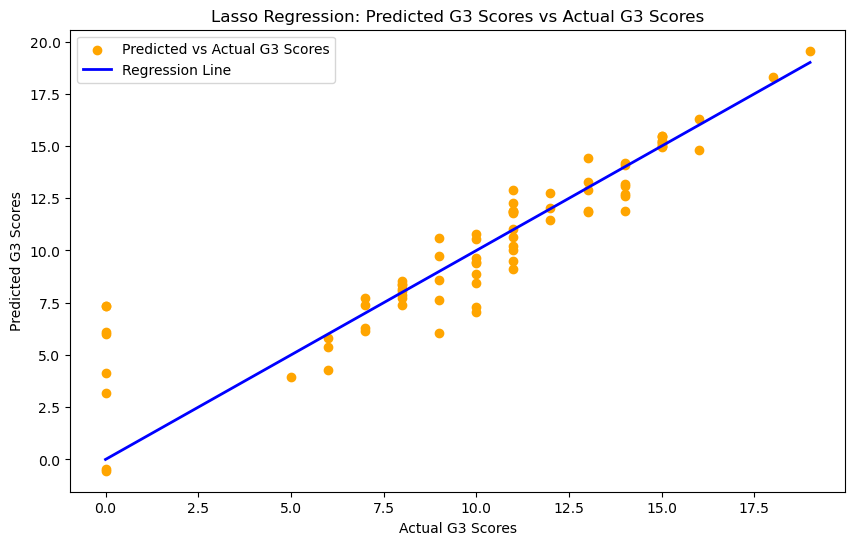

In [681]:
# plotting y-test values and final_predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, final_predictions, color='orange', label='Predicted vs Actual G3 Scores')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linewidth=2, label='Regression Line')
plt.title('Lasso Regression: Predicted G3 Scores vs Actual G3 Scores')
plt.xlabel('Actual G3 Scores')
plt.ylabel('Predicted G3 Scores')
plt.legend()
plt.show()

We had some outliers in the predicted values with the predicted values being unable to predict 0 as an actual value for a "G3" term grade, but as we can see from the chart that the Lasso Regression was able to accurately predict "G3" term grades. A student's "G1" and "G2" term grades are statistically significant in predicting "G3" term grades.

The features that I selected based on how they correlated to "G1" and "G2" seemed to be good features to include to predict "G3" term grades.

If the dataset had more rows then the model would've been more accurate. There could've been other features that were not included in the dataset that could've been useful like scores in individual class subjects, rating of their ability to read/write, ability to speak another language, or if they took higher level classes like honor or AP classes.

## Conclusion

The school disctrict would like to predict the grades in the third term using historical and demographic data of its students. We used information about many features of the students lives and machine learning techniques to create models to predict the third term grades of students. This is useful because we are now able to predict a students third term grade based on past data and we can supplement the students accordingly to increase the likelihood that the student will achieve a higher third term grade than they would've otherwise. Hopefully, the model can be used as a template for supplementing students accordingly, so they can achieve high G3 term scores.

The model that was created alligns with the business objective of predicting G3 term scores. With this model the school district can accurately predict their student's G3 term scores which will allow them to make business decisions to create an optimal learning environemt for their students. The model shouldn't be used as exact predictions of what score a student will achieve in their G3 term. There are many variables that are not included in the dataset that could influence a students score. The predictions made with the model should be used as a template for future students, not as a label for what a student will score.

This project was successful because of how features were selected, the pipelines and column transformers used, and the results of the grid search. Using the correlations as a parameter for feature selection made it so the model used statistically significant features. The pipelines and column transformers transformed the data so the features that were used in the regression would be optimized. The grid search fine-tuned the hyper parameters which made the model optimized for success.

There were still some outliers with the predicted values in the final model. This could be because there weren't enough significant features used in the model. To fix this more significant features could be included in the dataset that can be used in training the model. More histroical data would also help improve the models accuracy.

Next steps in this task would be to try using G1 term grades as the target label since more students were not absent during that time or to not sum the absences as absences throughout all three terms. This is because two students who missed the same amount of days in all three terms would be thought of as the same, but if one of those students missed more days in G1 and the other in G3, that would impact their G3 term scores. The data in the data set could be used to predict standardized test scores that are used to enroll into schools for higher education. A model could be made in the future that predicts these test scores for the students enrolled in the school district.